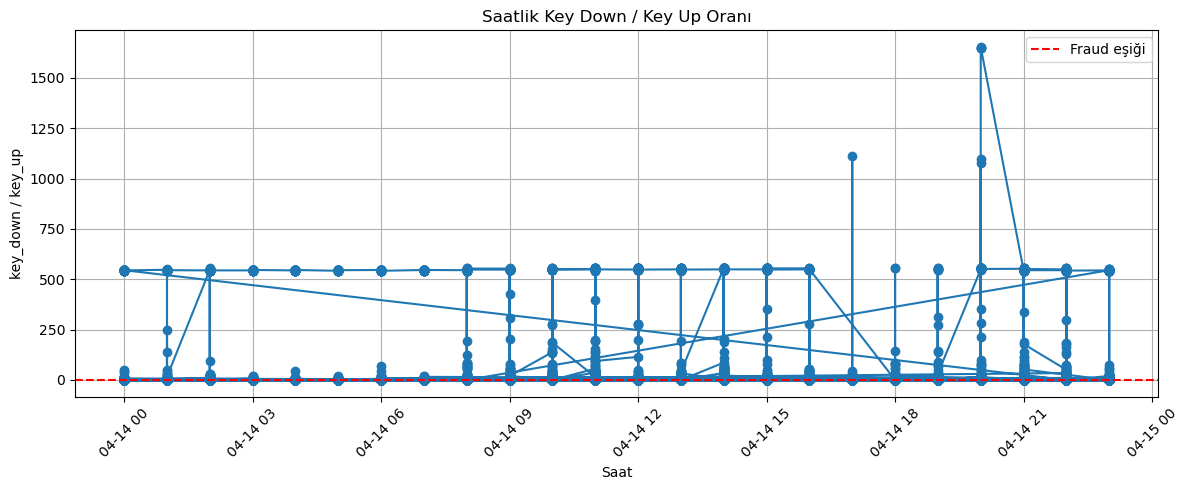

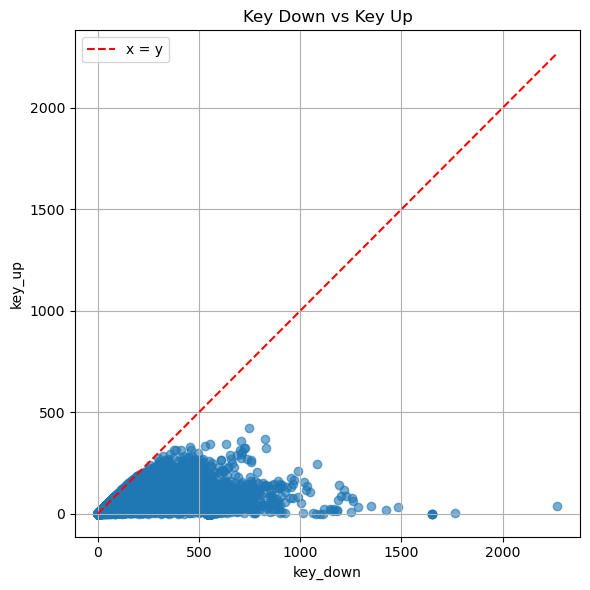

C:\Users\feyza\AppData\Local\Temp\ipykernel_14892\1147806598.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\feyza\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


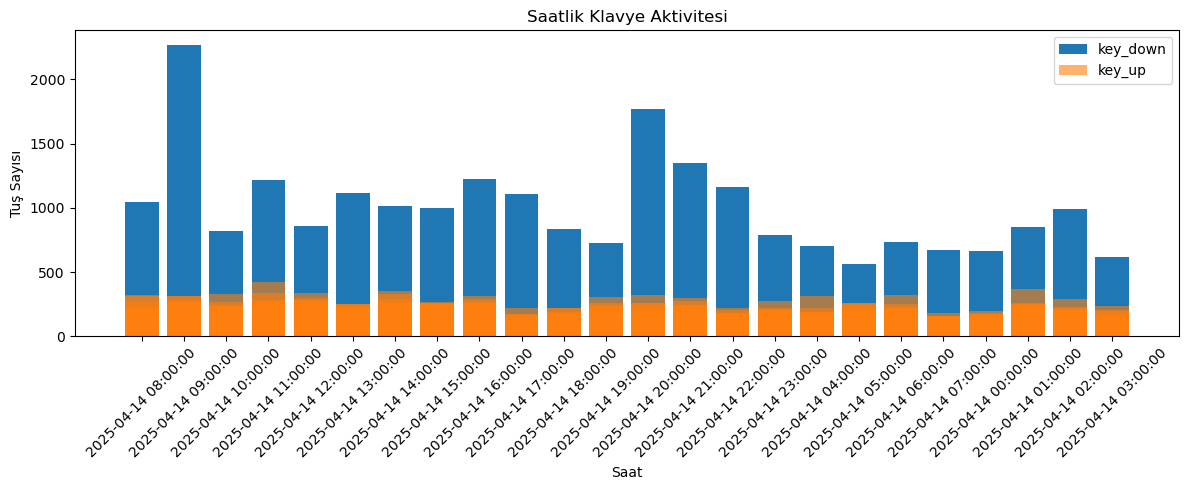

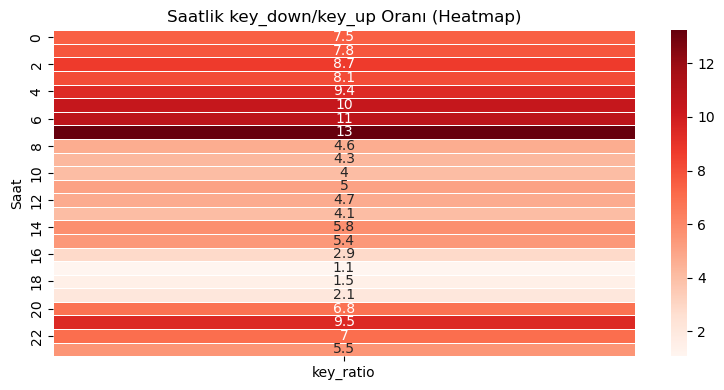

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV dosyasını yükle
df = pd.read_csv("C:/store/git/km-stat-activity/data/real/real_activity_log.csv")

# Saatlik zaman sütunu varsa kullan, yoksa oluştur
df["start_date_time"] = pd.to_datetime(df["start_date_time"], errors="coerce")
df = df[df["start_date_time"].notna()]
df["hour"] = df["start_date_time"].dt.floor("h")

# key_down / key_up oranı
df["key_ratio"] = df["key_down"] / (df["key_up"] + 1)

# Grafik 1: key_ratio zamanla line plot
plt.figure(figsize=(12, 5))
plt.plot(df["hour"], df["key_ratio"], marker='o')
plt.axhline(y=2.0, color='r', linestyle='--', label='Fraud eşiği')
plt.title("Saatlik Key Down / Key Up Oranı")
plt.xlabel("Saat")
plt.ylabel("key_down / key_up")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Grafik 2: Scatter plot key_down vs key_up
plt.figure(figsize=(6, 6))
plt.scatter(df["key_down"], df["key_up"], alpha=0.6)
plt.plot([0, df["key_down"].max()], [0, df["key_down"].max()], 'r--', label="x = y")
plt.xlabel("key_down")
plt.ylabel("key_up")
plt.title("Key Down vs Key Up")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Grafik 3: Saat saat key_down / key_up bar chart
plt.figure(figsize=(12, 5))
plt.bar(df["hour"].astype(str), df["key_down"], label="key_down")
plt.bar(df["hour"].astype(str), df["key_up"], label="key_up", alpha=0.6)
plt.xticks(rotation=45)
plt.title("Saatlik Klavye Aktivitesi")
plt.xlabel("Saat")
plt.ylabel("Tuş Sayısı")
plt.legend()
plt.tight_layout()
plt.show()

# Grafik 4: Heatmap key_ratio by hour
df["hour_only"] = df["hour"].dt.hour
heatmap_data = df.pivot_table(index="hour_only", values="key_ratio")

plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, annot=True, cmap="Reds", linewidths=0.5)
plt.title("Saatlik key_down/key_up Oranı (Heatmap)")
plt.ylabel("Saat")
plt.tight_layout()
plt.show()


In [11]:
!jupyter nbconvert --to html keyboard_activity_graphs.ipynb


[NbConvertApp] Converting notebook keyboard_activity_graphs.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 499819 bytes to keyboard_activity_graphs.html
